In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import os
import pickle
import pandas as pd
from collections import defaultdict

# Combining SRL results from all pickle files

In [ ]:
%cd /content/gdrive/MyDrive/NLU1012_Project/SRL_Results/

/content/gdrive/MyDrive/NLU1012_Project/SRL_Results


In [ ]:
ls

allSRL0-1Ratios_8_23_0.pkl         allSRLChiSquare_8_23_0.pkl
allSRL0-1Ratios_8_23_1.pkl         allSRLChiSquare_8_23_1.pkl
allSRL0-1Ratios_8_23.pkl           allSRLChiSquare_8_23.pkl
allSRL0-1Ratios_9_12_Cindy.pkl     allSRLChiSquare_9_12_Cindy.pkl
allSRL0-1Ratios_9_13_Cora.pkl      allSRLChiSquare_9_13_Cora.pkl
allSRLCheckResults_8_23_0.pkl      allSRLResults_8_23_0.pkl
allSRLCheckResults_8_23_1.pkl      allSRLResults_8_23_1.pkl
allSRLCheckResults_8_23.pkl        allSRLResults_8_23.pkl
allSRLCheckResults_9_12_Cindy.pkl  allSRLResults_9_12_Cindy.pkl
allSRLCheckResults_9_13_Cora.pkl   allSRLResults_9_13_Cora.pkl


In [ ]:
path = "/content/gdrive/MyDrive/NLU1012_Project/SRL_Results/"
files = [f for f in os.listdir(path) if f.endswith('.pkl')]

In [ ]:
def merge_dicts(d1, d2):
    """Merge two dictionaries. If they have overlapping keys, extend the lists."""
    for key, value in d2.items():
        if key in d1:
            if isinstance(value, list):
                d1[key].extend(value)
            # handle other data types if needed
        else:
            d1[key] = value
    return d1

def compileResultsbyPrefix(path):
    # List all the files in the directory
    files = [f for f in os.listdir(path) if f.endswith('.pkl')]

    # Group files by prefix
    file_groups = defaultdict(list)
    for file in files:
        # Split at the first underscore to determine the prefix
        prefix = file.split('_')[0]
        file_groups[prefix].append(file)

    # Compile files with the same prefix
    for prefix, group_files in file_groups.items():
        compiled_data = {}

        for file in group_files:
            with open(os.path.join(path, file), 'rb') as f:
                data = pickle.load(f)
                compiled_data = merge_dicts(compiled_data, data)  # Merge the dictionaries

        # save the files by the names of their prefix (Split at the first underscore to determine the prefix)
        with open(os.path.join(path, f'{prefix}.pkl'), 'wb') as f:
            pickle.dump(compiled_data, f)

    print("Compilation completed!")

In [ ]:
compileResultsbyPrefix(path)

Compilation completed!


In [ ]:
with open(os.path.join(path, 'allSRLResults.pkl'), 'rb') as f:
    data = pickle.load(f)

In [ ]:
data.keys()

dict_keys(['Emma', 'Great_Expectations', 'Jane_Eyre', 'Little_Women', 'Lolita', 'Mrs_Dalloway_in_Bond_Street', 'Pride_and_Prejudice', 'The_Great_Gatsby', 'The_Three_Musketeers', 'Villette', 'Moby-Dick', 'A_Room_with_a_View', 'The_Blue_Castle', 'The_Enchanted_April', 'Cranford', 'Twenty_Years_After', 'Down_and_Out_in_the_Magic_Kingdom', "Alice's_Adventures_in_Wonderland", 'Frankenstein', 'Crime_and_Punishmen', 'The_Yellow_Wallpaper', 'The_Romance_of_Lust_A_Classic_Victorian_Erotic_Novel', 'Grimms_Fairy_Tales', 'The_Adventures_of_Tom_Sawyer_Complete', 'The_Wonderful_Wizard_of_Oz', 'Adventures_of_Huckleberry_Finn', 'Anne_of_Green_Gables', 'The_Strange_Case_of_Dr_Jekyll_and_Mr_Hyde', 'Treasure_Island', 'A_Study_in_Scarlet', 'Wuthering_Heights', 'The_Scarlet_Letter', 'The_War_of_the_Worlds', 'Uncle_Toms_Cabin', 'The_Idiot', 'Dombey_and_Son', 'The_Possessed', 'The_Wind_in_the_Willows', 'Bleak_House', 'The_Turn_of_the_Screw', 'The_Tale_of_Peter_Rabbit', 'Madame_Bovary', 'Twenty_Thousand_Leagu

In [ ]:
len(data.keys())

43

# Turn SRL results into a dataframe

In [ ]:
def getRawCountdf(path):
    result_rawCount = pickle.load(open(path+'allSRLResults'+".pkl", 'rb'))
    # Construct a list of rows with the novel name and the corresponding counts for fem_arg0, fem_arg1, mal_arg0, and mal_arg1
    rows = []
    for novel, counts in result_rawCount.items():
        row = {
            'Novel': novel,
            'fem_arg0': counts['female']['ARG0'],
            'fem_arg1': counts['female']['ARG1'],
            'mal_arg0': counts['male']['ARG0'],
            'mal_arg1': counts['male']['ARG1']
        }
        rows.append(row)

    # Convert the list of rows into a DataFrame
    df_rawCount = pd.DataFrame(rows).set_index('Novel')
    return df_rawCount

In [ ]:
def getRatiodf(path):
    result_ratio = pickle.load(open(path+'allSRL0-1Ratios'+".pkl", 'rb'))
    # Convert to a DataFrame
    df_ratio = pd.DataFrame.from_dict(result_ratio, orient='index').reset_index() # colNames: index, female, male
    df_ratio.columns = ['Novel', 'fem_ratio', 'mal_ratio']
    return df_ratio

In [ ]:
def getFinaldf(path):
    df_rawCount = getRawCountdf(path)
    df_ratio = getRatiodf(path)

    final_df = pd.merge(df_rawCount, df_ratio, on='Novel', how='inner')

    # Given dictionary, add chi-square results
    result_chi = pickle.load(open(path+'allSRLChiSquare'+".pkl", 'rb'))

    # Extract p-values
    p_values = {novel: data['P-value'] for novel, data in result_chi.items()}

    # Convert to DataFrame
    p_df = pd.DataFrame(list(p_values.items()), columns=['Novel', 'P-value'])

    # Merge with final_df
    final_df = pd.merge(final_df, p_df, on='Novel', how='inner')
    return final_df

In [ ]:
final_df = getFinaldf(path)

In [ ]:
final_df

,Novel,fem_arg0,fem_arg1,mal_arg0,mal_arg1,fem_ratio,mal_ratio,P-value
0,Emma,3818,2785,2427,1828,0.578222,0.570388,4.316919e-01
1,Great_Expectations,1602,1122,4016,2599,0.588106,0.607105,9.268442e-02
2,Jane_Eyre,2130,1510,2357,1480,0.585165,0.614282,1.091917e-02
3,Little_Women,6843,2847,3186,1775,0.706192,0.642209,3.604022e-15
4,Lolita,1628,1171,591,372,0.581636,0.613707,8.775983e-02
5,Mrs_Dalloway_in_Bond_Street,146,53,31,13,0.733668,0.704545,8.369740e-01
6,Pride_and_Prejudice,3363,2093,1895,1517,0.616386,0.555393,1.462356e-08
7,The_Great_Gatsby,640,357,1221,668,0.641926,0.646374,8.441938e-01
8,The_Three_Musketeers,2290,1686,8201,4531,0.575956,0.644125,9.625923e-15
9,Villette,2408,1673,2818,1582,0.590051,0.640455,2.067765e-06


In [ ]:
# Save to CSV
final_df.to_csv('SRL_results_9_20_43novels.csv', index=False)

# Analysis

## Year

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/NLU1012_Project/Novel_results_final.csv')

In [4]:
df

,Title,Author,Publication_year,Author_Gender,First_or_third_person_narrative,First_narrative_gender,Original_language,Notes,fem_arg0,fem_arg1,mal_arg0,mal_arg1,fem_ratio,mal_ratio,P-value,Result,ratio_diff,OLD_Effect_change,Effect_change
0,Little_Women,Louisa_May_Alcott,1868,Female,Third,-,English,NaN,6843,2847,3186,1775,0.706192,0.642209,3.600000e-15,Female_gaze,0.063983,0.093599,0.117017
1,Pride_and_Prejudice,Jane_Austen,1813,Female,Third,-,English,NaN,3363,2093,1895,1517,0.616386,0.555393,1.460000e-08,Female_gaze,0.060993,-0.353688,-0.355121
2,The_Enchanted_April,Elizabeth_Von_Arnim,1922,Female,Third,-,English,NaN,3522,1958,1283,852,0.642701,0.600937,7.623560e-04,Female_gaze,0.041764,-0.358290,-0.100650
3,Cranford,Elizabeth_Gaskell,1853,Female,First,Female,English,NaN,1967,988,894,620,0.665651,0.590489,8.560000e-07,Female_gaze,0.075163,-0.178496,-0.247079
4,Anne_of_Green_Gables,Lucy_Maud_Montgomery,1908,Female,Third,-,English,NaN,3541,1931,876,542,0.647113,0.617772,4.321589e-02,Female_gaze,0.029341,0.431966,0.345861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,The_Hound_of_the_Baskervilles,Arthur Conan Doyle,1902,Male,First,Male,English,NaN,159,187,1167,934,0.459538,0.555450,1.115268e-03,Male_gaze,-0.095912,-0.004166,-0.065141
75,The_Idiot,Fyodor Dostoevsky,1869,Male,Third,-,Russian,NaN,2969,2160,7426,4420,0.578865,0.626878,4.140000e-09,Male_gaze,-0.048013,0.453019,0.323238
76,Dombey_and_Son,Charles Dickens,1848,Male,Third,-,English,NaN,6224,3976,10833,6351,0.610196,0.630412,8.867870e-04,Male_gaze,-0.020216,0.567916,1.133926
77,The_Romance_of_Lust_A_Classic_Victorian_Erotic...,Anonymous,1876,unknown,First,Male,English,NaN,4831,2969,1992,1041,0.618479,0.656775,2.315410e-04,Male_gaze,-0.038297,-0.144912,-0.020727


In [5]:
# Convert columns to appropriate data types
for col in ['fem_arg0', 'fem_arg1', 'mal_arg0', 'mal_arg1']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN values in essential columns for plotting
essential_columns = ['Publication_year', 'Author_Gender', 'fem_arg0', 'fem_arg1', 'mal_arg0', 'mal_arg1', 'fem_ratio', 'mal_ratio', 'Effect_change']
df_cleaned = df.dropna(subset=essential_columns)

# Display the first few rows of the cleaned dataset and its info
df_cleaned.head(), df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Title                            79 non-null     object 
 1   Author                           79 non-null     object 
 2   Publication_year                 79 non-null     int64  
 3   Author_Gender                    79 non-null     object 
 4   First_or_third_person_narrative  79 non-null     object 
 5   First_narrative_gender           79 non-null     object 
 6   Original_language                79 non-null     object 
 7   Notes                            0 non-null      float64
 8   fem_arg0                         79 non-null     int64  
 9   fem_arg1                         79 non-null     int64  
 10  mal_arg0                         79 non-null     int64  
 11  mal_arg1                         79 non-null     int64  
 12  fem_ratio               

(                  Title                Author  Publication_year Author_Gender  \
 0          Little_Women     Louisa_May_Alcott              1868        Female   
 1   Pride_and_Prejudice           Jane_Austen              1813        Female   
 2   The_Enchanted_April   Elizabeth_Von_Arnim              1922        Female   
 3              Cranford     Elizabeth_Gaskell              1853        Female   
 4  Anne_of_Green_Gables  Lucy_Maud_Montgomery              1908        Female   
 
   First_or_third_person_narrative First_narrative_gender Original_language  \
 0                           Third                      -           English   
 1                           Third                      -           English   
 2                           Third                      -           English   
 3                           First                 Female           English   
 4                           Third                      -           English   
 
    Notes  fem_arg0  fem_arg1 

In [6]:
# create a column called 'relative_agency'
# df_cleaned['relative_agency'] = df_cleaned['fem_ratio']/df_cleaned['mal_ratio']
df_cleaned['relative_agency_adjusted'] = df_cleaned['mal_ratio']/df_cleaned['fem_ratio'] - 1

In [ ]:
df_cleaned_sorted = df_cleaned.sort_values(by='relative_agency_adjusted')

In [ ]:
print(df_cleaned_sorted[:5])

                         Title             Author  Publication_year  \
14    Through_the_LookingGlass      Lewis Carroll              1871   
22    The_Tale_of_Peter_Rabbit     Beatrix Potter              1902   
3                     Cranford  Elizabeth_Gaskell              1853   
13  A_Christmas_Carol_in_Prose    Charles Dickens              1843   
1          Pride_and_Prejudice        Jane_Austen              1813   

   Author_Gender First_or_third_person_narrative First_narrative_gender  \
14          Male                           Third                      -   
22        Female                           Third                      -   
3         Female                           First                 Female   
13          Male                           Third                      -   
1         Female                           Third                      -   

   Original_language  Notes  fem_arg0  fem_arg1  ...  fem_ratio  mal_ratio  \
14           English    NaN      1250       

In [ ]:
print(df_cleaned_sorted[-5:])

                   Title                    Author  Publication_year  \
44  The_Yellow_Wallpaper  Charlotte_Perkins_Gilman              1892   
57       Treasure_Island    Robert_Louis_Stevenson              1883   
68  The_Sign_of_the_Four        Arthur Conan Doyle              1890   
62              Carmilla   Joseph Sheridan Le Fanu              1872   
21                Anthem                  Ayn Rand              1938   

   Author_Gender First_or_third_person_narrative First_narrative_gender  \
44        Female                           First                 Female   
57          Male                           First                   Male   
68          Male                           First                   Male   
62          Male                           First                 Female   
21        Female                           First                   Male   

   Original_language  Notes  fem_arg0  fem_arg1  ...  fem_ratio  mal_ratio  \
44           English    NaN        53 

In [ ]:
print(df_cleaned[-30:])

                                                Title  \
49                               A_Tale_of_Two_Cities   
50                                            Dracula   
51                         The_Picture_of_Dorian_Gray   
52                  The_Adventures_of_Sherlock_Holmes   
53                                      Anna_Karenina   
54                          The_Count_of_Monte_Cristo   
55                             The_Brothers_Karamazov   
56                               Crime_and_Punishment   
57                                    Treasure_Island   
58                                 A_Study_in_Scarlet   
59                              The_War_of_the_Worlds   
60                                   The_Time_Machine   
61                         Notes_from_the_Underground   
62                                           Carmilla   
63                                  David_Copperfield   
64                                       Oliver_Twist   
65                    Around_th

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

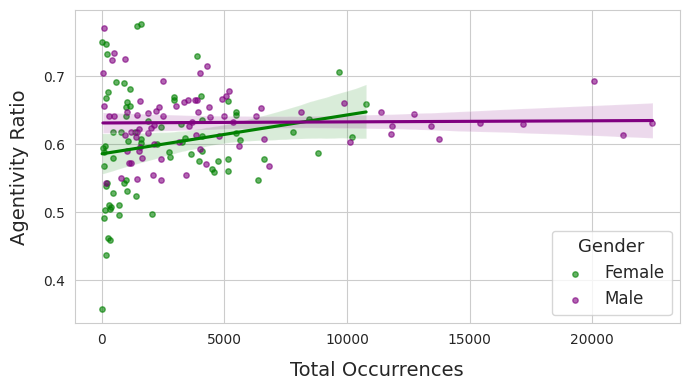

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate female_rawCount and male_rawCount
df_cleaned['female_rawCount'] = df_cleaned['fem_arg0'] + df_cleaned['fem_arg1']
df_cleaned['male_rawCount'] = df_cleaned['mal_arg0'] + df_cleaned['mal_arg1']

sns.set_style("whitegrid")

# sns.set_palette("colorblind")
# colors = sns.color_palette()
# female_color = colors[0]  # blue
# male_color = colors[1]    # orange

# Create the plot
plt.figure(figsize=(7, 4))
sns.regplot(x='female_rawCount', y='fem_ratio', data=df_cleaned, color="green", label='Female',scatter_kws={'alpha': 0.6, 's': 15})
sns.regplot(x='male_rawCount', y='mal_ratio', data=df_cleaned, color="purple" , label='Male',scatter_kws={'alpha': 0.6, 's': 15})
# sns.regplot(x='female_rawCount', y='relative_agency_adjusted', data=df_cleaned, color='green', label='Female',scatter_kws={'alpha': 0.6})
# sns.regplot(x='male_rawCount', y='relative_agency_adjusted', data=df_cleaned, color='purple', label='Male',scatter_kws={'alpha': 0.6})
# plt.title('Scatter Plot of Female and Male Raw Counts vs Ratios')
plt.xlabel('Total Occurrences', fontsize=14, labelpad=10)
plt.ylabel('Agentivity Ratio', fontsize=14, labelpad=10)
plt.legend(title='Gender', title_fontsize='13', fontsize='12')
plt.tight_layout()
from google.colab import files
plt.savefig("Agentivity Ratio against Total Occurrences by Gender.png", dpi=300)
files.download("Agentivity Ratio against Total Occurrences by Gender.png")
plt.show()

# # Create the plot
# plt.figure(figsize=(10, 6))  # Increase size for better readability

# # Use a white grid style for the plot


# # Create regplots
# sns.regplot(x='female_rawCount', y='fem_ratio', data=df_cleaned,
#             color='green', label='Female',
#             scatter_kws={'alpha': 0.6},
#             line_kws={'color': 'darkgreen'})  # Darken line color for print readability
# sns.regplot(x='male_rawCount', y='mal_ratio', data=df_cleaned,
#             color='purple', label='Male',
#             scatter_kws={'alpha': 0.6},
#             line_kws={'color': 'indigo'})  # Darken line color for print readability

# # Label the axes and provide a title
# plt.xlabel('Total Occurrences', fontsize=14, labelpad=10)  # Increase fontsize and pad for clarity
# plt.ylabel('Agentivity Ratio', fontsize=14, labelpad=10)  # Increase fontsize and pad for clarity
# plt.title('Analysis of Agentivity Ratio against Total Occurrences\nby Gender', fontsize=16, pad=20)  # Added newline for layout

# # Add a legend
# plt.legend(title='Gender', title_fontsize='13', fontsize='12')  # Add title to legend and adjust fontsize

# # Ensure layout is tight
# plt.tight_layout()

# # Optionally save the plot as a .png file
# # plt.savefig("plot_name.png", dpi=300)  # dpi to ensure quality is preserved in the saved figure

# # Display the plot
# plt.show()




In [ ]:

# Add a constant (intercept) for the linear regression model
X = sm.add_constant(df_cleaned['female_rawCount'])
model = sm.OLS(df_cleaned['fem_ratio'], X).fit()

print("Female Ratio Model Summary:")
print(model.summary())

# To get the coefficient (slope) and p-value specifically:
print("\nCoefficient (Slope) of female_rawCount:", model.params[1])
print("P-value for hypothesis test on slope:", model.pvalues[1])

Female Ratio Model Summary:
                            OLS Regression Results                            
Dep. Variable:              fem_ratio   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     3.143
Date:                Thu, 05 Oct 2023   Prob (F-statistic):             0.0802
Time:                        14:50:08   Log-Likelihood:                 91.678
No. Observations:                  79   AIC:                            -179.4
Df Residuals:                      77   BIC:                            -174.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const         

In [ ]:
import statsmodels.api as sm
# Add a constant (intercept) for the linear regression model
X = sm.add_constant(df_cleaned['male_rawCount'])
model = sm.OLS(df_cleaned['mal_ratio'], X).fit()

print("Male Ratio Model Summary:")
print(model.summary())

# To get the coefficient (slope) and p-value specifically:
print("\nCoefficient (Slope) of Male_rawCount:", model.params[1])
print("P-value for hypothesis test on slope:", model.pvalues[1])

Male Ratio Model Summary:
                            OLS Regression Results                            
Dep. Variable:              mal_ratio   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                   0.02382
Date:                Thu, 05 Oct 2023   Prob (F-statistic):              0.878
Time:                        14:50:56   Log-Likelihood:                 132.09
No. Observations:                  79   AIC:                            -260.2
Df Residuals:                      77   BIC:                            -255.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

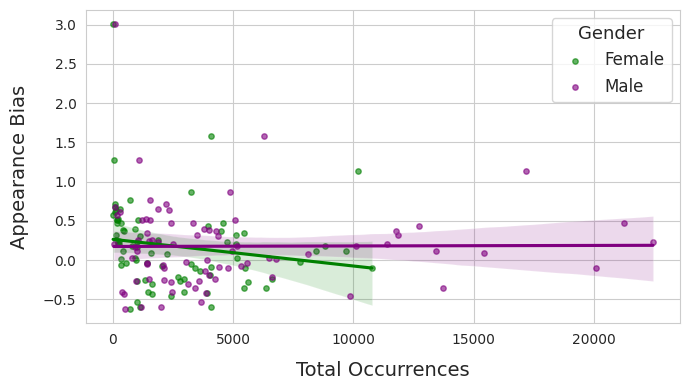

In [ ]:
# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(7, 4))
sns.regplot(x='female_rawCount', y='Effect_change', data=df_cleaned, color='green', label='Female',scatter_kws={'alpha': 0.6, 's': 15})
sns.regplot(x='male_rawCount', y='Effect_change', data=df_cleaned, color='purple', label='Male',scatter_kws={'alpha': 0.6, 's': 15})
# plt.title('Scatter Plot of Female and Male Raw Counts vs WEAT Effect Change')
plt.xlabel('Total Occurrences', fontsize=14, labelpad=10)
plt.ylabel('Appearance Bias', fontsize=14, labelpad=10)
plt.legend(title='Gender', title_fontsize='13', fontsize='12')
plt.tight_layout()
plt.savefig("Appearance Bias against Total Occurrences by Gender.png", dpi=300)
files.download("Appearance Bias against Total Occurrences by Gender.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

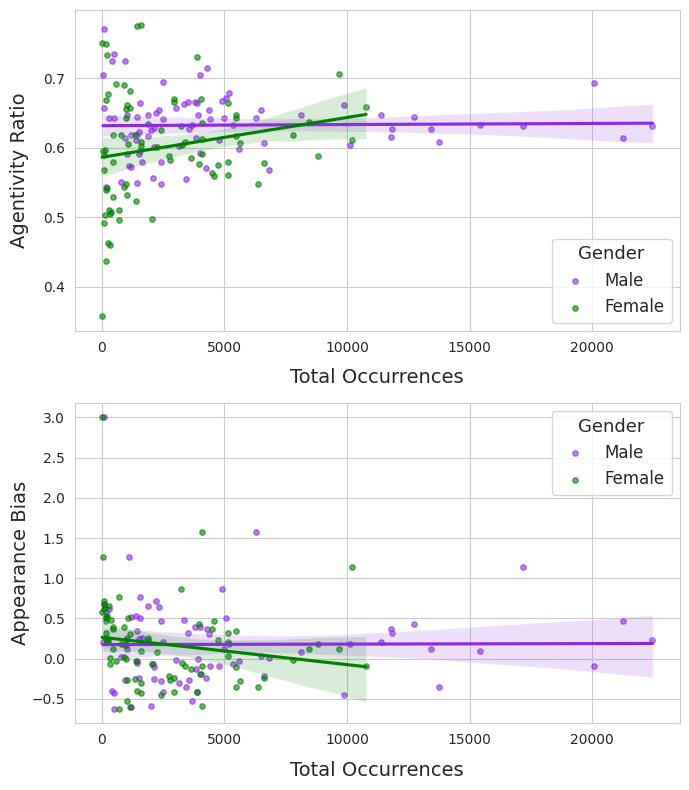

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Calculations and data prep...
df_cleaned['female_rawCount'] = df_cleaned['fem_arg0'] + df_cleaned['fem_arg1']
df_cleaned['male_rawCount'] = df_cleaned['mal_arg0'] + df_cleaned['mal_arg1']

sns.set_style("whitegrid")

# Set up a 2x1 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 8))

# Plot for Agentivity Ratio
sns.regplot(x='male_rawCount', y='mal_ratio', data=df_cleaned, color='blueviolet', label='Male', scatter_kws={'alpha': 0.6, 's': 15}, ax=axes[0])
sns.regplot(x='female_rawCount', y='fem_ratio', data=df_cleaned, color="green", label='Female', scatter_kws={'alpha': 0.6, 's': 15}, ax=axes[0])
axes[0].set_xlabel('Total Occurrences', fontsize=16, labelpad=10)
axes[0].set_ylabel('Agentivity Ratio', fontsize=16, labelpad=10)
axes[0].legend(title='Gender', title_fontsize='13', fontsize='12')

# Plot for Appearance Bias
sns.regplot(x='male_rawCount', y='Effect_change', data=df_cleaned, color='blueviolet', label='Male', scatter_kws={'alpha': 0.6, 's': 15}, ax=axes[1])
sns.regplot(x='female_rawCount', y='Effect_change', data=df_cleaned, color='green', label='Female', scatter_kws={'alpha': 0.6, 's': 15}, ax=axes[1])
axes[1].set_xlabel('Total Occurrences', fontsize=16, labelpad=10)
axes[1].set_ylabel('Appearance Bias', fontsize=16, labelpad=1)
axes[1].legend(title='Gender', title_fontsize='13', fontsize='12')

# Shared Legend
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, title='Gender', title_fontsize='13', fontsize='12', loc='center right')

# Adjust layout
plt.tight_layout()

# Save and download
plt.savefig("Combined_Plot.pdf", dpi=300,bbox_inches='tight')
files.download("Combined_Plot.pdf")

# Show the figure
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

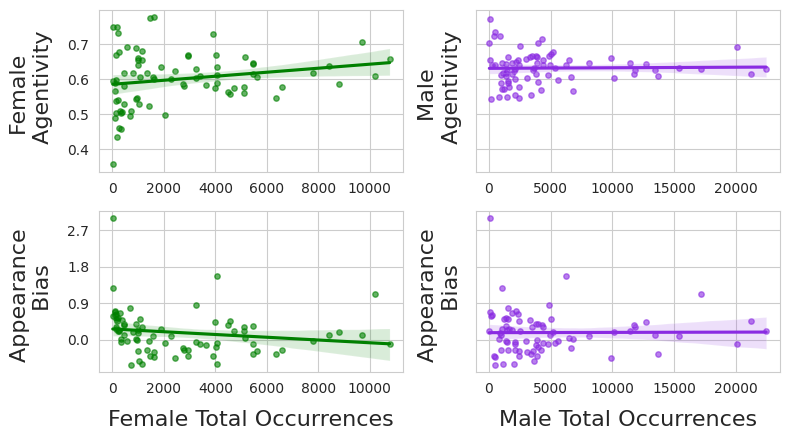

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
import numpy as np

# Calculations and data prep...
df_cleaned['female_rawCount'] = df_cleaned['fem_arg0'] + df_cleaned['fem_arg1']
df_cleaned['male_rawCount'] = df_cleaned['mal_arg0'] + df_cleaned['mal_arg1']

sns.set_style("whitegrid")

# Set up a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 4.5), sharey='row')

# Plot 1: Agentivity Ratio for Female
sns.regplot(x='female_rawCount', y='fem_ratio', data=df_cleaned, color='green', scatter_kws={'alpha': 0.6, 's': 15}, ax=axes[0, 0])
# axes[0, 0].set_xlabel('Female Character Total Occurrences', fontsize=14, labelpad=10)
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Female \n Agentivity', fontsize=16, labelpad=10)
# axes[0, 0].set_title('Female', fontsize=16)

# Plot 2: Agentivity Ratio for Male
sns.regplot(x='male_rawCount', y='mal_ratio', data=df_cleaned, color='blueviolet', scatter_kws={'alpha': 0.6, 's': 15}, ax=axes[0, 1])
# axes[0, 1].set_xlabel('Male Character Total Occurrences', fontsize=14, labelpad=10)
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Male \n Agentivity', fontsize=16, labelpad=10)
# axes[0, 1].set_title('Male', fontsize=16)

# Plot 3: Appearance Bias for Female
sns.regplot(x='female_rawCount', y='Effect_change', data=df_cleaned, color='green', scatter_kws={'alpha': 0.6, 's': 15}, ax=axes[1, 0])
axes[1, 0].set_xlabel('Female Total Occurrences', fontsize=16, labelpad=10)
axes[1, 0].set_ylabel('Appearance \n Bias', fontsize=16, labelpad=10)
axes[1, 0].set_yticks(np.linspace(0, 2.7, 4))

# Plot 4: Appearance Bias for Male
sns.regplot(x='male_rawCount', y='Effect_change', data=df_cleaned, color='blueviolet', scatter_kws={'alpha': 0.6, 's': 15}, ax=axes[1, 1])
axes[1, 1].set_xlabel('Male Total Occurrences', fontsize=16, labelpad=10)
axes[1, 1].set_ylabel('Appearance \n Bias', fontsize=16, labelpad=10)


# Adjust layout
plt.tight_layout()

# Save and potentially download the plot
plt.savefig("Total_Occurrence_Agentivity_Appearance_Bias.pdf", bbox_inches='tight')
files.download("Total_Occurrence_Agentivity_Appearance_Bias.pdf")

# If you're running this outside of Google Colab and want to display the plot
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

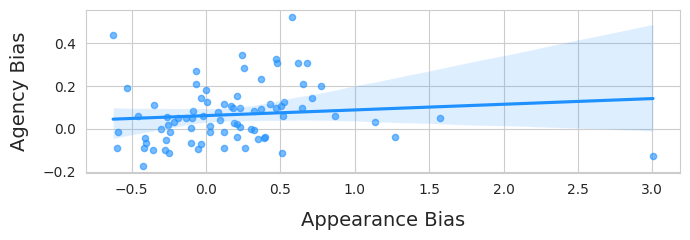

In [13]:
# Create the modified scatter plot for relative_agency with best fit line and confidence interval
plt.figure(figsize=(7, 2.5))
sns.set_style("whitegrid")
sns.regplot(x='Effect_change', y='relative_agency_adjusted', data=df_cleaned, scatter_kws={'alpha': 0.6, 's': 20}, line_kws={'color': 'dodgerblue'}, color='dodgerblue')
# plt.title('Scatter Plot of Relative Agency vs. Effect_change')
plt.xlabel('Appearance Bias', fontsize=14, labelpad=10)
plt.ylabel('Agency Bias', fontsize=14, labelpad=10)
plt.tight_layout()
plt.savefig("Alignment_Metric.pdf", bbox_inches='tight')
files.download("Alignment_Metric.pdf")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

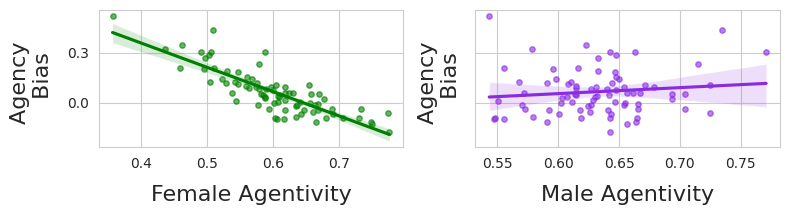

In [33]:
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
import numpy as np
sns.set_style("whitegrid")

# Set up a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 2.25), sharey='row')

# Plot 3: Appearance Bias for Female
sns.regplot(x='fem_ratio', y='relative_agency_adjusted', data=df_cleaned, color='green', scatter_kws={'alpha': 0.6, 's': 15}, ax=axes[0])
axes[0].set_xlabel('Female Agentivity', fontsize=16, labelpad=10)
axes[0].set_ylabel('Agency \n Bias', fontsize=16, labelpad=10)
axes[0].set_yticks(np.linspace(0, 0.3, 2))

# Plot 4: Appearance Bias for Male
sns.regplot(x='mal_ratio', y='relative_agency_adjusted', data=df_cleaned, color='blueviolet', scatter_kws={'alpha': 0.6, 's': 15}, ax=axes[1])
axes[1].set_xlabel('Male Agentivity', fontsize=16, labelpad=10)
axes[1].set_ylabel('Agency \n Bias', fontsize=16, labelpad=10)
# axes[1].set_xticks(np.linspace(0.55, 0.8, 5))

# Adjust layout
plt.tight_layout()

# Save and potentially download the plot
plt.savefig("Agentivity_versus_Agency_Bias.pdf", bbox_inches='tight')
files.download("Agentivity_versus_Agency_Bias.pdf")

plt.show()

In [9]:
import statsmodels.api as sm
# Add a constant (intercept) for the linear regression model
X = sm.add_constant(df_cleaned['Effect_change'])
model = sm.OLS(df_cleaned['relative_agency_adjusted'], X).fit()

print("Male Ratio Model Summary:")
print(model.summary())

# To get the coefficient (slope) and p-value specifically:
print("\nCoefficient (Slope) of Effect_change:", model.params[1])
print("P-value for hypothesis test on slope:", model.pvalues[1])

Male Ratio Model Summary:
                               OLS Regression Results                               
Dep. Variable:     relative_agency_adjusted   R-squared:                       0.011
Model:                                  OLS   Adj. R-squared:                 -0.002
Method:                       Least Squares   F-statistic:                    0.8495
Date:                      Thu, 19 Oct 2023   Prob (F-statistic):              0.360
Time:                              23:35:37   Log-Likelihood:                 46.276
No. Observations:                        79   AIC:                            -88.55
Df Residuals:                            77   BIC:                            -83.81
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

In [11]:
## Conduct Pearson Correlation value between agency bias & appearance bias
import scipy
correlation_coefficient, p_value = scipy.stats.pearsonr(df_cleaned['Effect_change'], df_cleaned['relative_agency_adjusted'], alternative='two-sided', method=None)

print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.10446358879517924
P-value: 0.3595602852921879


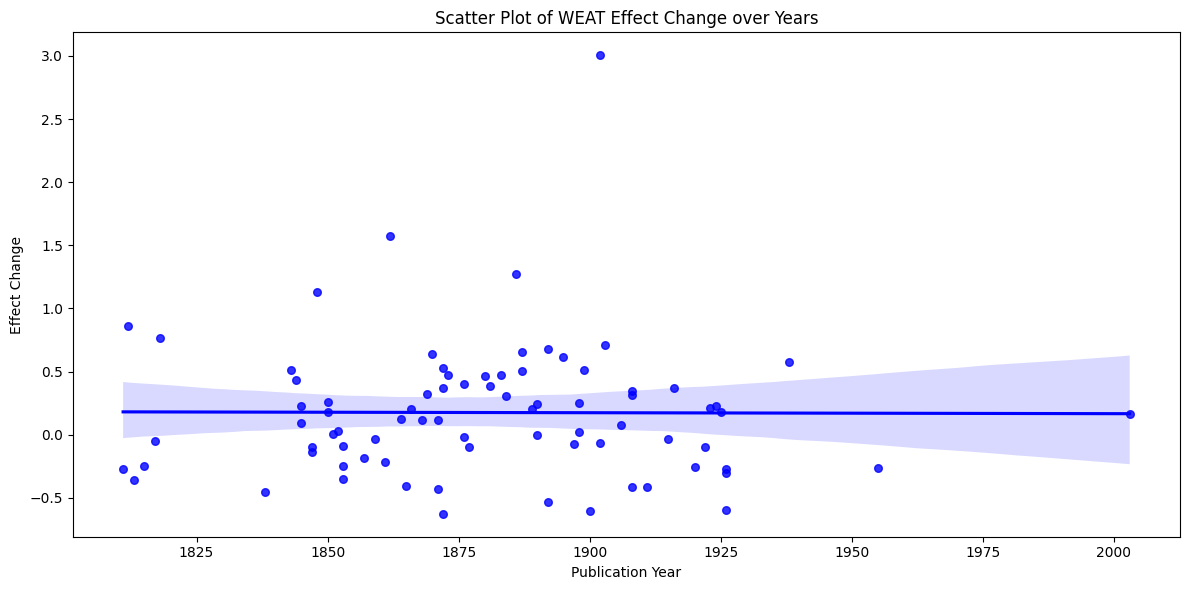

In [ ]:
# Create the modified scatter plot for effect_change with best fit line and confidence interval
plt.figure(figsize=(12, 6))
sns.regplot(x='Publication_year', y='Effect_change', data=df_cleaned, scatter_kws={'s': 30}, line_kws={'color': 'blue'}, color='blue')
plt.title('Scatter Plot of WEAT Effect Change over Years')
plt.xlabel('Publication Year')
plt.ylabel('Effect Change')
plt.tight_layout()
plt.show()

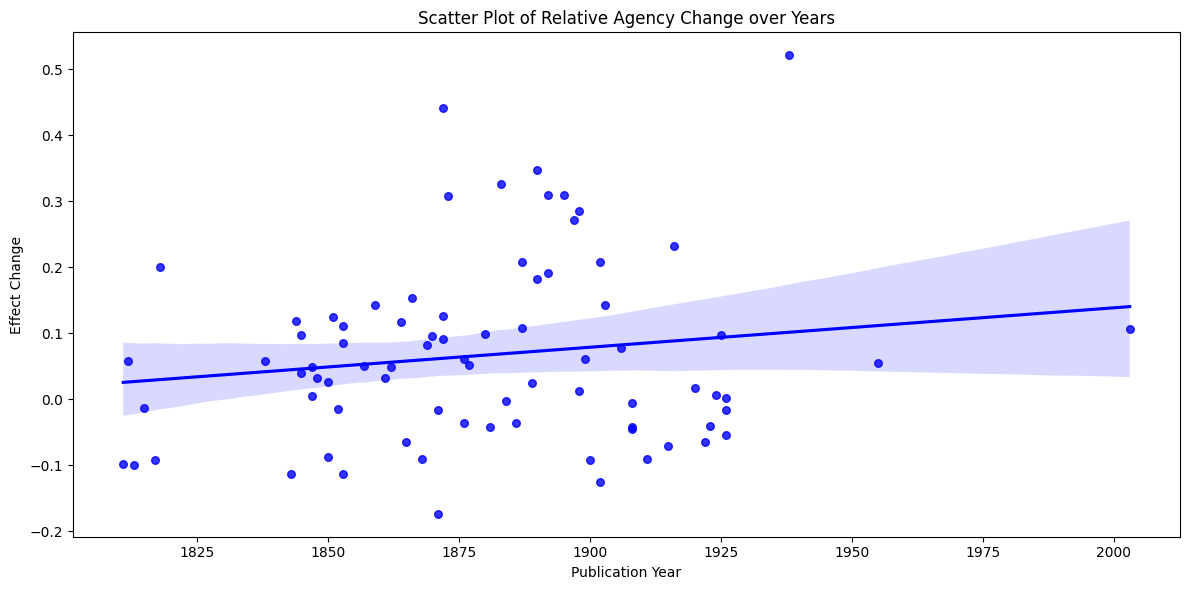

In [ ]:
# Create the modified scatter plot for relative_agency with best fit line and confidence interval
plt.figure(figsize=(12, 6))
sns.regplot(x='Publication_year', y='relative_agency_adjusted', data=df_cleaned, scatter_kws={'s': 30}, line_kws={'color': 'blue'}, color='blue')
plt.title('Scatter Plot of Relative Agency Change over Years')
plt.xlabel('Publication Year')
plt.ylabel('Effect Change')
plt.tight_layout()
plt.show()

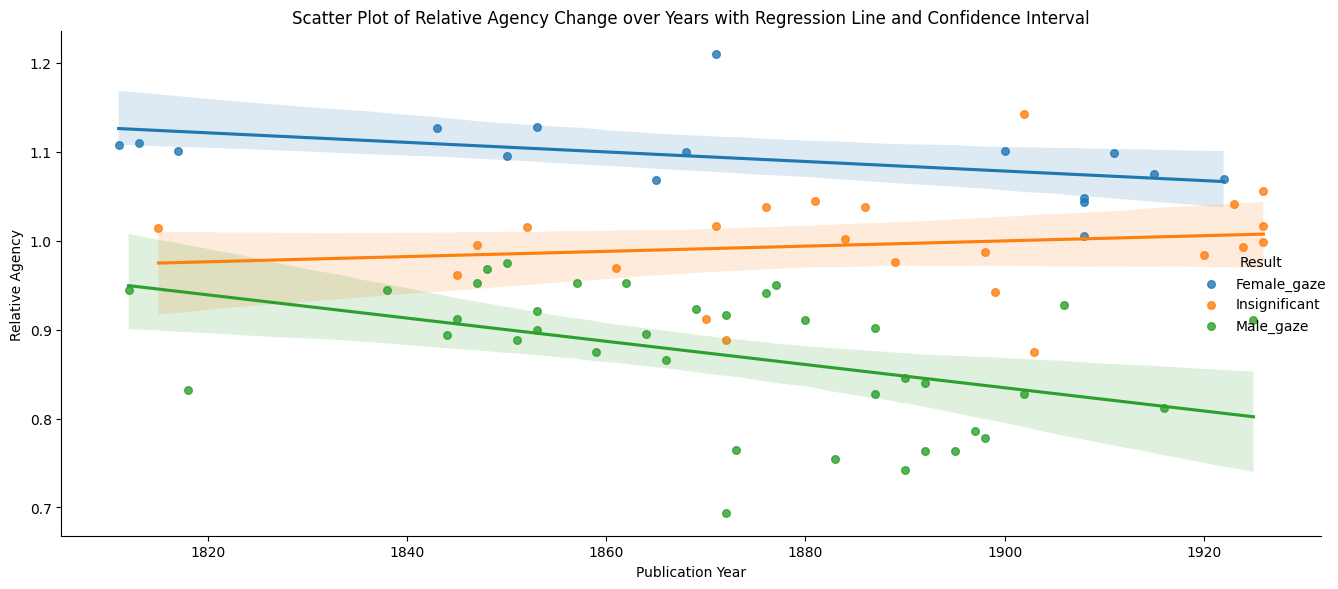

In [ ]:
# Create the scatter plot with regression line and confidence interval

# Filter the dataframe to include only records where 'Publication_year' is before 1930
df_filtered = df_cleaned[df_cleaned['Publication_year'] < 1930]

lm_plot = sns.lmplot(x='Publication_year', y='relative_agency', hue='Result', data=df_filtered, height=6, aspect=2, scatter_kws={'s': 30})
plt.title('Scatter Plot of Relative Agency Change over Years with Regression Line and Confidence Interval')
plt.xlabel('Publication Year')
plt.ylabel('Relative Agency')
plt.tight_layout()
plt.show()

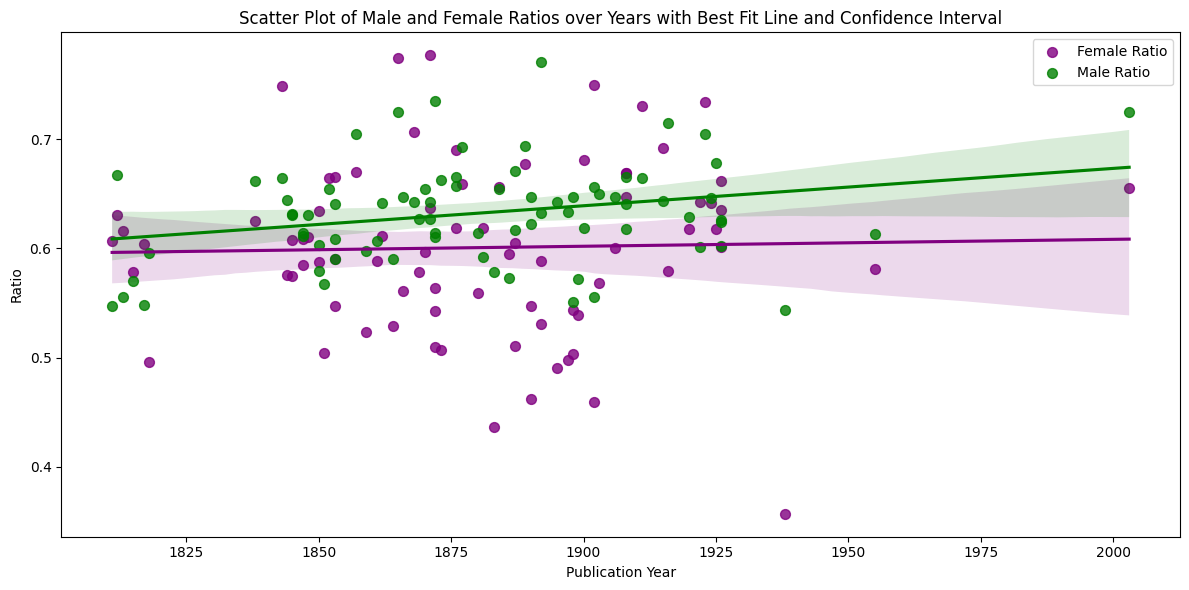

In [ ]:
# Create the modified scatter plot for male_ratio and female_ratio with best fit line and confidence interval
plt.figure(figsize=(12, 6))

# Scatter plot for female_ratio
sns.regplot(x='Publication_year', y='fem_ratio', data=df_cleaned, scatter_kws={'s': 50}, line_kws={'color': 'purple'}, color='purple', label='Female Ratio')

# Scatter plot for male_ratio
sns.regplot(x='Publication_year', y='mal_ratio', data=df_cleaned, scatter_kws={'s': 50}, line_kws={'color': 'green'}, color='green', label='Male Ratio')

plt.title('Scatter Plot of Male and Female Ratios over Years with Best Fit Line and Confidence Interval')
plt.xlabel('Publication Year')
plt.ylabel('Ratio')
plt.legend()
plt.tight_layout()
plt.show()


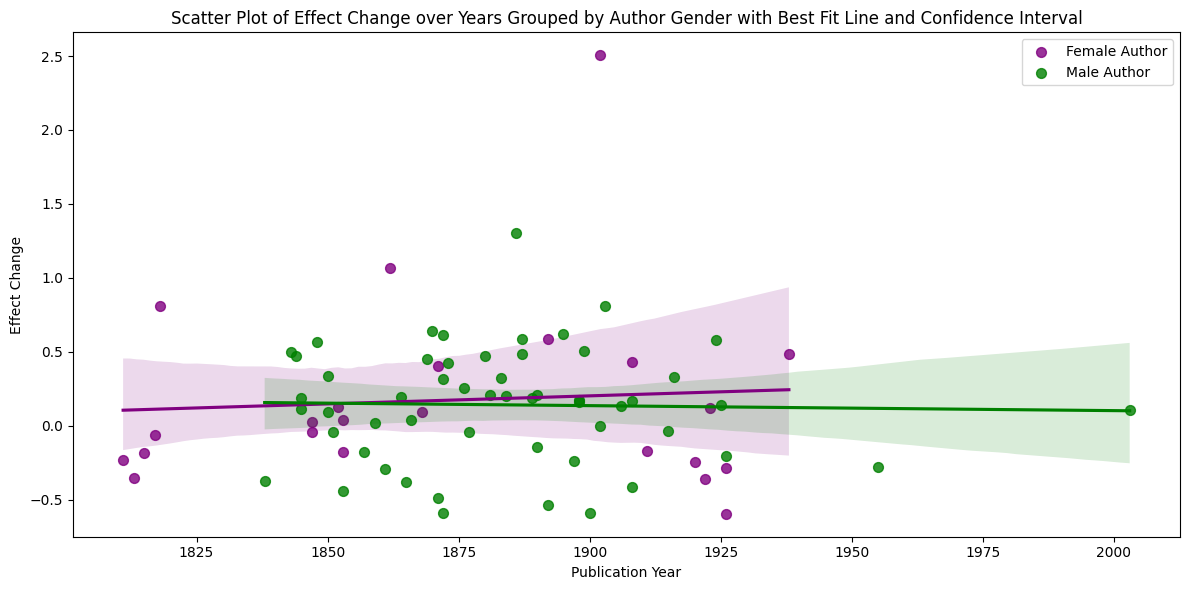

In [ ]:
# Create the modified scatter plot for effect_change grouped by Author_Gender with best fit line and confidence interval
plt.figure(figsize=(12, 6))

# Scatter plot for Female Authors
sns.regplot(x='Publication_year', y='Effect_change', data=df_cleaned[df_cleaned['Author_Gender'] == 'Female'],
            scatter_kws={'s': 50}, line_kws={'color': 'purple'}, color='purple', label='Female Author')

# Scatter plot for Male Authors
sns.regplot(x='Publication_year', y='Effect_change', data=df_cleaned[df_cleaned['Author_Gender'] == 'Male'],
            scatter_kws={'s': 50}, line_kws={'color': 'green'}, color='green', label='Male Author')

plt.title('Scatter Plot of Effect Change over Years Grouped by Author Gender with Best Fit Line and Confidence Interval')
plt.xlabel('Publication Year')
plt.ylabel('Effect Change')
plt.legend()
plt.tight_layout()
plt.show()

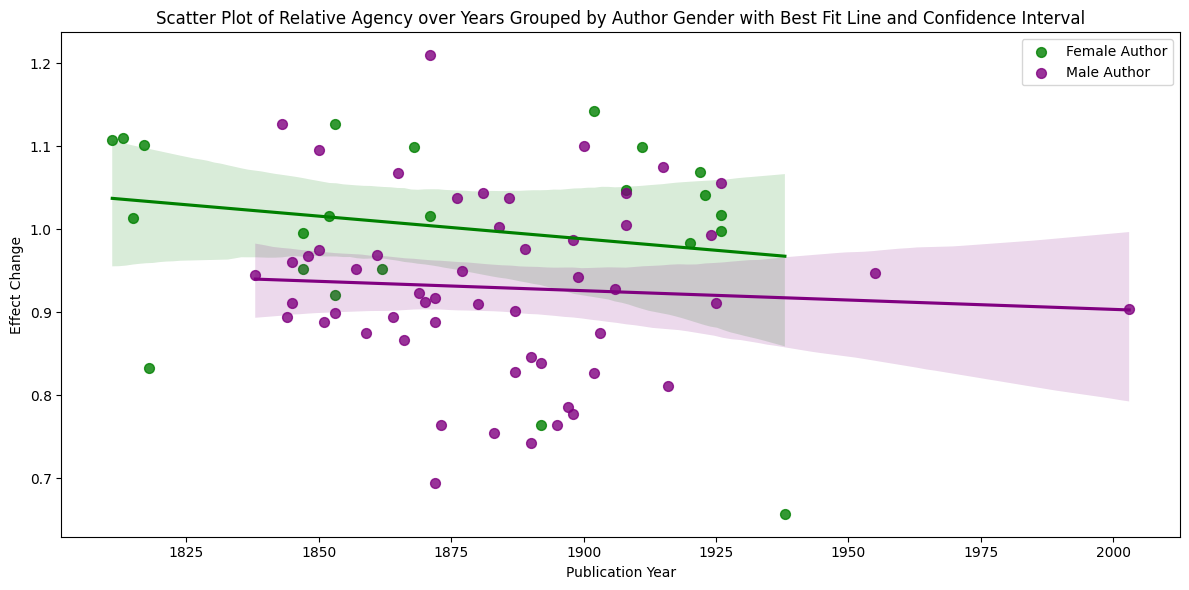

In [ ]:
# Create the modified scatter plot for effect_change grouped by Author_Gender with best fit line and confidence interval
plt.figure(figsize=(12, 6))

# Scatter plot for Female Authors
sns.regplot(x='Publication_year', y='relative_agency', data=df_cleaned[df_cleaned['Author_Gender'] == 'Female'],
            scatter_kws={'s': 50}, line_kws={'color': 'green'}, color='green', label='Female Author')

# Scatter plot for Male Authors
sns.regplot(x='Publication_year', y='relative_agency', data=df_cleaned[df_cleaned['Author_Gender'] == 'Male'],
            scatter_kws={'s': 50}, line_kws={'color': 'purple'}, color='purple', label='Male Author')

plt.title('Scatter Plot of Relative Agency over Years Grouped by Author Gender with Best Fit Line and Confidence Interval')
plt.xlabel('Publication Year')
plt.ylabel('Effect Change')
plt.legend()
plt.tight_layout()
plt.show()

a scatter plot, where the x-axis is the female_char_raw, and the y_axis is the male_char_raw, and there are two groups in the dots (grouped by author_gender) and two regressions lines, too.

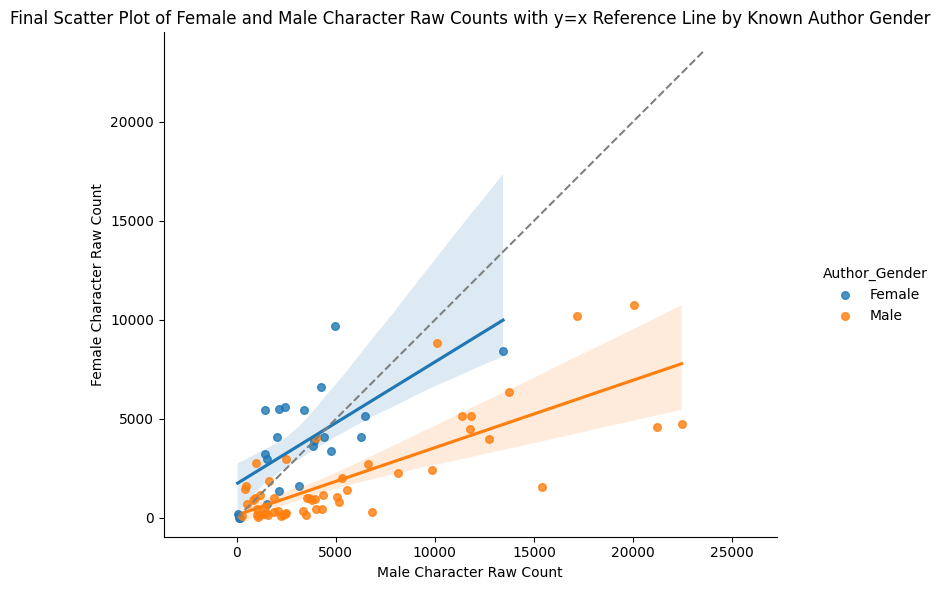

In [ ]:
df_known_gender = df_cleaned[df_cleaned['Author_Gender'] != 'unknown']

# Create a scatter plot with lmplot again to have equal grid spacing and separate regression lines for each 'Author_Gender' group
lm_gender_plot_final = sns.lmplot(x='male_rawCount', y='female_rawCount', height = 6, hue='Author_Gender', data=df_known_gender, scatter_kws={'s': 30})
plt.axis('equal')  # Set equal scaling for x and y-axis to maintain equal grid spacing

# Add y=x reference line
max_limit = max(lm_gender_plot_final.ax.get_xlim()[1], lm_gender_plot_final.ax.get_ylim()[1])
plt.plot([0, max_limit], [0, max_limit], color='gray', linestyle='--')  # y=x line

# Set title and labels
plt.title('Final Scatter Plot of Female and Male Character Raw Counts with y=x Reference Line by Known Author Gender')
plt.xlabel('Male Character Raw Count')
plt.ylabel('Female Character Raw Count')

# Adjust layout
# Explicitly set the axis limits to start from 0
plt.xlim(0, max_limit)
plt.ylim(0, max_limit)
plt.tight_layout()
plt.show()

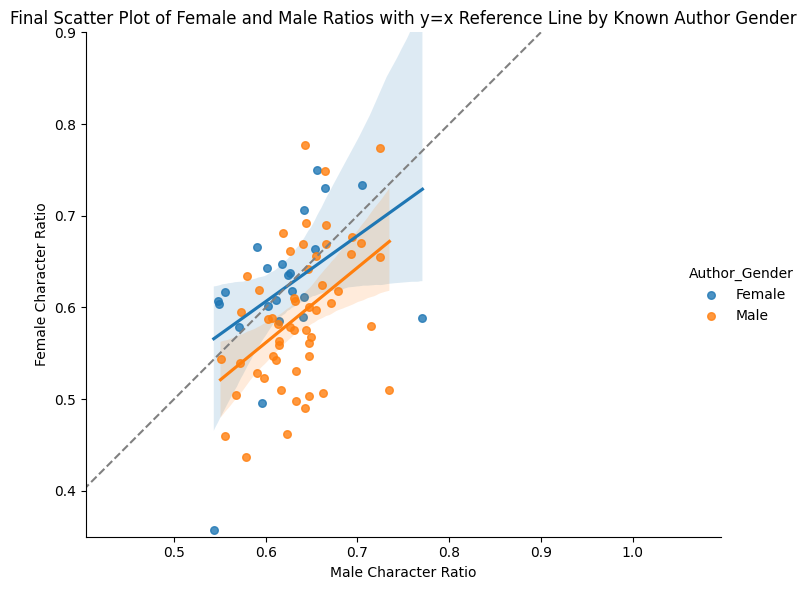

In [ ]:
df_known_gender = df_cleaned[df_cleaned['Author_Gender'] != 'unknown']

# Create a scatter plot with lmplot again to have equal grid spacing and separate regression lines for each 'Author_Gender' group
lm_gender_plot_final = sns.lmplot(x='mal_ratio', y='fem_ratio', height = 6, hue='Author_Gender', data=df_known_gender, scatter_kws={'s': 30})
plt.axis('equal')  # Set equal scaling for x and y-axis to maintain equal grid spacing

# Add y=x reference line
# max_limit = max(lm_gender_plot_final.ax.get_xlim()[1], lm_gender_plot_final.ax.get_ylim()[1])
max_limit = 0.9
plt.plot([0.35, max_limit], [0.35, max_limit], color='gray', linestyle='--')  # y=x line

# Set title and labels
plt.title('Final Scatter Plot of Female and Male Ratios with y=x Reference Line by Known Author Gender')
plt.xlabel('Male Character Ratio')
plt.ylabel('Female Character Ratio')

# Adjust layout
# Explicitly set the axis limits to start from 0
plt.xlim(0.6, max_limit)
plt.ylim(0.35, max_limit)
plt.tight_layout()
plt.show()

In [ ]:
min(df_known_gender['mal_ratio'])

0.543352601